In [32]:
import os
import gensim
from gensim import corpora, models, similarities
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
dataset = pd.read_csv('../data/Labelled_tweets_v1.csv')
tweets_five_topics = dataset[(dataset.Issue == 'Fodder scam') | (dataset.Issue == 'Triple Talaq SC verdict') | (dataset.Issue == 'hike in oil prices') | (dataset.Issue == 'PNB Scam') | (dataset.Issue == 'Ram Mandir')]
tweets =tweets_five_topics['Tweet']
tweets = tweets.tolist()
tweets_without_processing = tweets

#nltk.download('stopwords')
#print(stopwords.words('english'))
for i in range(0,len(tweets)):
     tweets[i] = re.sub('USER_MENTION','',tweets[i])
     tweets[i] = re.sub('URL','',tweets[i])
     tweets[i] = [w for w in tweets[i].split() if not w in stopwords.words('english') and (len(w)>2)]
     #tweets[i] = [w for w in tweets[i]if len(w)>2]
     tweets[i] = " ".join(tweets[i])

In [17]:
sentences = [[f] for f in tweets]
for i in range(len(sentences)):
    sentences[i] = sentences[i][0].split()

In [22]:
id2word = corpora.Dictionary(sentences)

# Create Corpus
texts = sentences

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
#print(id2word)
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]]


In [25]:
mallet_path = '/home/bedanta/political-stance-classification/Code/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [26]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [56]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=sentences, start=1, limit=10, step=2)

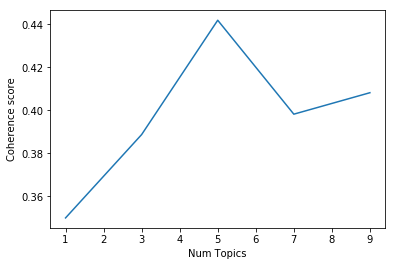

In [62]:
limit=10; start=1; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.legend(("coherence_values"), loc='best')
plt.savefig('coherence_five.eps',fmt ='eps',dpi = 1000)
plt.show()

In [61]:
plt.savefig('coherence_five.eps',fmt ='eps',dpi = 1000)

<Figure size 432x288 with 0 Axes>

In [65]:
from PIL import Image

In [67]:
stance_eps = Image.open("stanceF1.eps")

/home/bedanta/ml/lib/python3.5/site-packages/PIL/EpsImagePlugin.py:212: DeprecationWarning: 'U' mode is deprecated
  fp = open(self.fp.name, "Ur", encoding='latin-1')


In [70]:
stance_eps.save('stance_png.eps','eps',dpi=100)

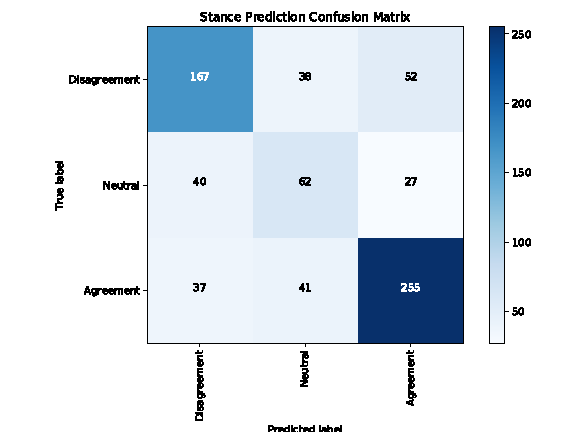

In [77]:
stance_eps